<a href="https://colab.research.google.com/github/ranshull/Analyzing-Startup-Ecosystem-and-Funding-Trends-in-India/blob/main/notebooks/Machine_learning_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

REGRESSION

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PROJECT_DS/CSV/cleaned2_Startup_funding.csv')

In [4]:
df=data.copy()

LABELING CATEGORICAL DATA  FOR TRAINING

In [5]:
df['Industry_Vertical'].unique()

array(['EdTech', 'FinTech', 'Technology', 'Hospitality', 'FoodTech',
       'ECommerce', 'B2B', 'Consumer Goods', 'SaaS', 'Retail', 'Services',
       'Healthcare', 'Artificial Intelligence', 'Gaming',
       'Consumer Internet', 'Logistics', 'Real Estate', 'CleanTech',
       'Media', 'Automation', 'Others', 'Fashion', 'Transport', 'Beauty',
       'Auto', 'Marketplace', 'Analytics', 'Home Decor',
       'Food & Beverage'], dtype=object)

In [6]:
industry_encoding = {
    'EdTech': 0,
    'FinTech': 1,
    'Technology': 2,
    'Hospitality': 3,
    'FoodTech': 4,
    'ECommerce': 5,
    'B2B': 6,
    'Consumer Goods': 7,
    'SaaS': 8,
    'Retail': 9,
    'Services': 10,
    'Healthcare': 11,
    'Artificial Intelligence': 12,
    'Gaming': 13,
    'Consumer Internet': 14,
    'Logistics': 15,
    'Real Estate': 16,
    'CleanTech': 17,
    'Media': 18,
    'Automation': 19,
    'Others': 20,
    'Fashion': 21,
    'Transport': 22,
    'Beauty': 23,
    'Auto': 24,
    'Marketplace': 25,
    'Analytics': 26,
    'Home Decor': 27,
    'Food & Beverage': 28
}
df['Industry_Vertical_encoded'] = df['Industry_Vertical'].map(industry_encoding)


In [7]:
df['City_Location'].unique()

array(['Bangalore', 'New Delhi', 'Mumbai', 'Gurgaon', 'Chennai', 'Pune',
       'Noida', 'Unknown', 'Faridabad', 'Hyderabad', 'Tulangan', 'Bhopal',
       'Jaipur', 'Amritsar', 'Nagpur', 'Indore', 'Rourkela', 'Ahmedabad',
       'Bhubaneswar', 'Srinagar', 'Chandigarh', 'Coimbatore', 'Kolkata',
       'Udaipur', 'Surat', 'Kochi', 'Udupi', 'Karur', 'Gwalior', 'Goa',
       'Gaya', 'Vadodara', 'Trivandrum', 'Panaji', 'Agra', 'Hubli',
       'Kozhikode', 'Siliguri', 'Lucknow', 'Kanpur', 'Varanasi',
       'Jodhpur', 'Belgaum'], dtype=object)

In [8]:
city_encoding = {
    'Bangalore': 0,
    'New Delhi': 1,
    'Mumbai': 2,
    'Gurgaon': 3,
    'Chennai': 4,
    'Pune': 5,
    'Noida': 6,
    'Unknown': 7,
    'Faridabad': 8,
    'Hyderabad': 9,
    'Tulangan': 10,
    'Bhopal': 11,
    'Jaipur': 12,
    'Amritsar': 13,
    'Nagpur': 14,
    'Indore': 15,
    'Rourkela': 16,
    'Ahmedabad': 17,
    'Bhubaneswar': 18,
    'Srinagar': 19,
    'Chandigarh': 20,
    'Coimbatore': 21,
    'Kolkata': 22,
    'Udaipur': 23,
    'Surat': 24,
    'Kochi': 25,
    'Udupi': 26,
    'Karur': 27,
    'Gwalior': 28,
    'Goa': 29,
    'Gaya': 30,
    'Vadodara': 31,
    'Trivandrum': 32,
    'Panaji': 33,
    'Agra': 34,
    'Hubli': 35,
    'Kozhikode': 36,
    'Siliguri': 37,
    'Lucknow': 38,
    'Kanpur': 39,
    'Varanasi': 40,
    'Jodhpur': 41,
    'Belgaum': 42
}
df['City_Location_encoded'] = df['City_Location'].map(city_encoding)


In [9]:
df['Investment_Type'].unique()

array(['Private Equity', 'Pre-Series A', 'Seed Funding', 'Series C',
       'Series B', 'Series A', 'Series E', 'Series D', 'Series F',
       'Series H', 'Series G', 'Other', 'Debt Funding', 'Angel Funding',
       'Venture Round', 'Series J'], dtype=object)

In [10]:
investment_type_encoding = {
    'Private Equity': 0,
    'Pre-Series A': 1,
    'Seed Funding': 2,
    'Series C': 3,
    'Series B': 4,
    'Series A': 5,
    'Series E': 6,
    'Series D': 7,
    'Series F': 8,
    'Series H': 9,
    'Series G': 10,
    'Other': 11,
    'Debt Funding': 12,
    'Angel Funding': 13,
    'Venture Round': 14,
    'Series J': 15
}
df['Investment_Type_encoded'] = df['Investment_Type'].map(investment_type_encoding)


In [11]:
df.select_dtypes(include=np.number)

,Amount_USD,Year,investor_count,Industry_Vertical_encoded,City_Location_encoded,Investment_Type_encoded
0,200000000.0,2020,1,0,0,0
1,3000000.0,2020,1,1,1,1
2,1800000.0,2020,1,2,2,2
3,8048394.0,2020,1,2,3,3
4,18358860.0,2020,1,2,0,4
...,...,...,...,...,...,...
2868,25000000.0,2015,1,2,3,0
2869,1529113.0,2015,1,2,4,2
2870,25795550.0,2015,2,27,0,0
2871,10000000.0,2015,1,2,0,0


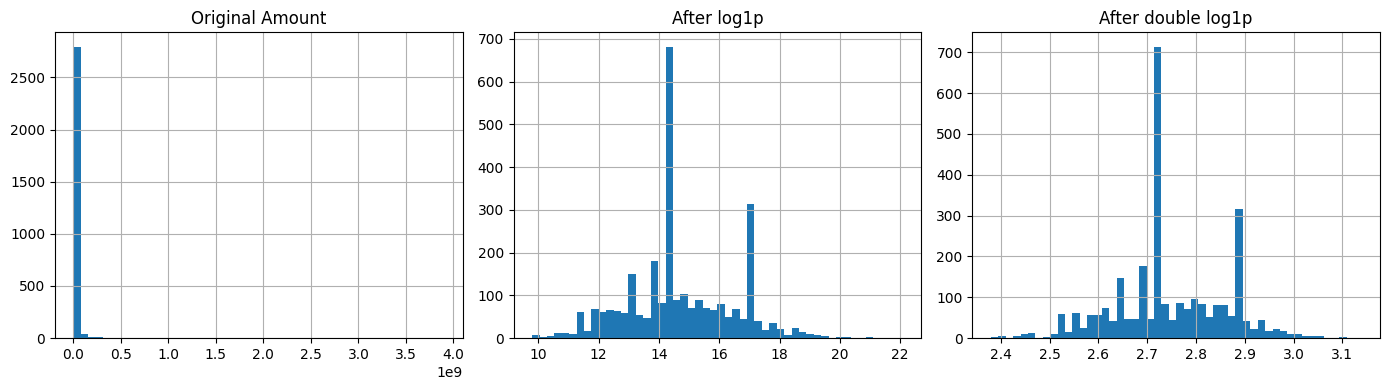

In [12]:

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(14, 4))

# 1. Original
plt.subplot(1, 3, 1)
df['Amount_USD'].hist(bins=50)
plt.title('Original Amount')

# 2. log1p
plt.subplot(1, 3, 2)
np.log1p(df['Amount_USD']).hist(bins=50)
plt.title('After log1p')

# 3. log1p(log1p)
plt.subplot(1, 3, 3)
np.log1p(np.log1p(df['Amount_USD'])).hist(bins=50)
plt.title('After double log1p')

# Show all at once
plt.tight_layout()
plt.show()


- Startup funding data is right-skewed — most companies raise small amounts, but a few raise huge sums.

- Applying log1p() compresses large values, making the distribution more balanced and normal.


---



In [13]:
df['Amount_USD'] = np.log1p(np.log1p(df['Amount_USD']))


In [14]:
#range of values in amount
df['Amount_USD'].describe()

,Amount_USD
count,2873.000000
mean,2.747486
std,0.114856
min,2.379378
25%,2.695675
50%,2.723937
75%,2.840136
max,3.139150


REMOVING OUTLIERS

In [15]:
data=df['investor_count']

q1=np.percentile(data,25)
q3=np.percentile(data,75)
IQR=q3-q1
print(f'IQR:{IQR}')
lowwiskers=q1-1.5*IQR
highwiskers=q3+1.5*IQR
print(f'lowwiskers:{lowwiskers}')
print(f'highwiskers:{highwiskers}')
no_outliers=df[(df['investor_count']>=lowwiskers) & (df['investor_count']<=highwiskers)]

no_outliers

IQR:1.0
lowwiskers:-0.5
highwiskers:3.5


,Date,Startup_Name,Industry_Vertical,SubVertical,City_Location,Investors_Name,Investment_Type,Amount_USD,Remarks,Year,amount_category,investor_count,Industry_Vertical_encoded,City_Location_encoded,Investment_Type_encoded
0,2020-01-09,BYJU’S,EdTech,E-learning,Bangalore,Tiger Global Management,Private Equity,3.001408,No Remark,2020,High,1,0,0,0
1,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,2.767207,No Remark,2020,Medium,1,1,1,1
2,2020-01-02,Fashor,Technology,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,2.734582,No Remark,2020,Medium,1,2,2,2
3,2020-01-13,Shuttl,Technology,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,2.827372,No Remark,2020,Medium,1,2,3,3
4,2020-01-09,Mamaearth,Technology,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,2.875011,No Remark,2020,High,1,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2868,2015-04-11,Zomato,Technology,Unknown,Gurgaon,Info Edge (India),Private Equity,2.892280,Late Stage,2015,High,1,2,3,0
2869,2015-04-10,iMMi Life,Technology,Unknown,Chennai,Unitus Seed Fund,Seed Funding,2.723937,No Remark,2015,Medium,1,2,4,2
2870,2015-04-28,Urban Ladder,Home Decor,Unknown,Bangalore,"Anand Rajaraman, Venky Harinarayan",Private Equity,2.894016,Series D,2015,High,2,27,0,0
2871,2015-04-28,Babajobs,Technology,Unknown,Bangalore,SEEK Ltd & affiliates,Private Equity,2.840136,Series B,2015,Medium,1,2,0,0


In [16]:
# Amount_USD outlier removal

data=no_outliers['Amount_USD']

q1=np.percentile(data,25)
q3=np.percentile(data,75)
IQR=q3-q1
print(f'IQR:{IQR}')
lowwiskers=q1-1.5*IQR
highwiskers=q3+1.5*IQR
print(f'lowwiskers:{lowwiskers}')
print(f'highwiskers:{highwiskers}')
no_outliers_amount = no_outliers[
    (no_outliers['Amount_USD'] >= lowwiskers) &
    (no_outliers['Amount_USD'] <= highwiskers)
]


IQR:0.14446142486671354
lowwiskers:2.4789825728602537
highwiskers:3.056828272327108


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# 1. Prepare features and target
x = no_outliers_amount[['Industry_Vertical_encoded', 'City_Location_encoded', 'Investment_Type_encoded', 'investor_count', 'Year']]
y = no_outliers_amount['Amount_USD']

# 2. Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 3. Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "KNN Regressor": KNeighborsRegressor()
}

# 4. Train and evaluate each model
print("Model Performance (R² Score):")
print("----------------------------------")
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    print(f"{name:20s}: R² = {r2:.4f}")


Model Performance (R² Score):
----------------------------------
Linear Regression   : R² = 0.1514
Decision Tree       : R² = 0.3167
Random Forest       : R² = 0.4473
Gradient Boosting   : R² = 0.5317
KNN Regressor       : R² = 0.4058


Gradient Boosting has best r-score of 0.53.

In [18]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Replace with your best trained model
best_model = GradientBoostingRegressor()
best_model.fit(x_train, y_train)

# Predict on test set
y_pred = best_model.predict(x_test)

# Reverse log transforms if needed for evaluation (if target was transformed)
y_test_true = np.expm1(np.expm1(y_test))
y_pred_true = np.expm1(np.expm1(y_pred))

# Error Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📉 Regression Error Metrics:")
print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"MSE  (Mean Squared Error):       {mse:.2f}")
print(f"RMSE (Root Mean Squared Error):  {rmse:.2f}")
print(f"R² Score (Coefficient of Determination): {r2:.4f}")


new_input = np.array([[5, 3, 2, 4, 2021]])

# Make prediction
predicted_funding = best_model.predict(new_input)
predicted_amount = np.expm1(np.expm1(predicted_funding))



print("Predicted Funding Amount (USD):", predicted_funding)
print(f"Predicted Funding Amount (USD): ${predicted_amount[0]:,.2f}")

📉 Regression Error Metrics:
MAE  (Mean Absolute Error):      0.06
MSE  (Mean Squared Error):       0.01
RMSE (Root Mean Squared Error):  0.08
R² Score (Coefficient of Determination): 0.5318
Predicted Funding Amount (USD): [2.7768189]
Predicted Funding Amount (USD): $3,498,433.43


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


RMSE = 0.08 (log scale) is quite good, meaning your predictions are consistently close on the transformed scale.

 R² = 0.53 is moderate — it’s not bad, but also not strong enough for high-accuracy tasks. It's okay for exploratory analysis or rough forecasting, but not ideal for precise funding prediction.

CLASSIFCATION

In [19]:
q1 = no_outliers_amount['Amount_USD'].quantile(0.33)
q2 = no_outliers_amount['Amount_USD'].quantile(0.66)

def balanced_category(amount):
    if amount <= q1:
        return 'Low'
    elif amount <= q2:
        return 'Medium'
    else:
        return 'High'

no_outliers_amount['amount_category_balanced'] = no_outliers_amount['Amount_USD'].apply(balanced_category)


/tmp/ipython-input-295199835.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers_amount['amount_category_balanced'] = no_outliers_amount['Amount_USD'].apply(balanced_category)


In [20]:
# • Label encode categorical variables
no_outliers_amount['amount_category_balanced'].unique()


array(['High', 'Medium', 'Low'], dtype=object)

In [21]:
amount_category_encoding = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}
no_outliers_amount['amount_category_encoded'] = no_outliers_amount['amount_category_balanced'].map(amount_category_encoding)

/tmp/ipython-input-2127186256.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers_amount['amount_category_encoded'] = no_outliers_amount['amount_category_balanced'].map(amount_category_encoding)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Features and target
from sklearn.preprocessing import StandardScaler


X = no_outliers_amount[['Industry_Vertical_encoded', 'Investment_Type_encoded', 'investor_count']]
y = no_outliers_amount['amount_category_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000),
    "Decision Tree": DecisionTreeClassifier(random_state=42,),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(),

}

# Print only accuracy
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: {acc:.4f}")


Logistic Regression: 0.7894
Decision Tree: 0.8160
Random Forest: 0.8180
KNN: 0.8160
SVM: 0.8057


Random forest has the best accuracy.

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Example mapping
class_mapping = {
    0: 'Low',
    1: 'Mid',
    2: 'High'
}

# Already trained model
rf_model = RandomForestClassifier().fit(X_train, y_train)

# Example input - use correct feature order
new_data = [[2, 3, 1]]

# Predict class
rf_pred = rf_model.predict(new_data)[0]

# Map to label
rf_label = class_mapping.get(rf_pred, 'Unknown')

print(f"Prediction using Random Forest: {rf_pred} → {rf_label}")


Prediction using Random Forest: 2 → High


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


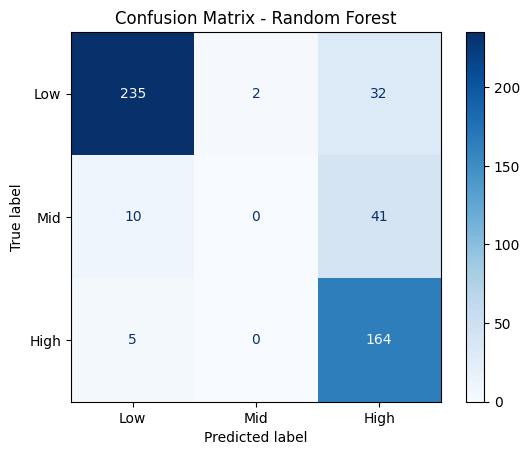

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on test data
y_pred = rf_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Optional: Class names if using encoded labels
class_names = ['Low', 'Mid', 'High']

# Display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()


- Low class is predicted quite well: 235 out of 269 correct (~87.4%).

- High class also performs strongly: 164 out of 169 correct (~96.4%).

- Mid class is poorly classified: Only 0 out of 51 predicted correctly .

which means we have to work on the model more on mid values.


Feature Importance:
                     Feature  Importance
1    Investment_Type_encoded    0.900246
0  Industry_Vertical_encoded    0.086404
2             investor_count    0.013350


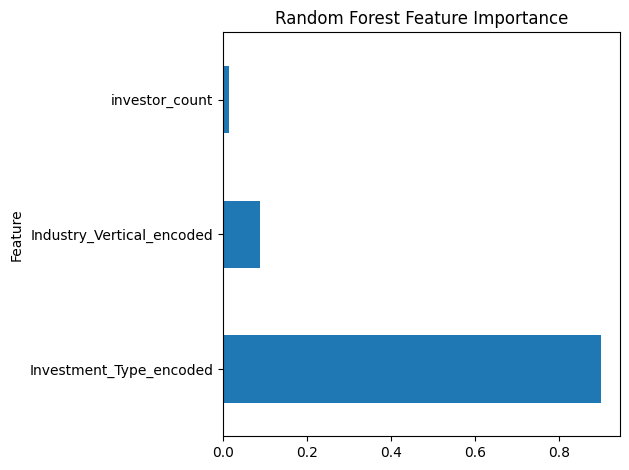

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_

# Assuming X_train is a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance_df)

# Optional plot
feature_importance_df.plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()
